## Unsupervised Learning Algorithms

### Clustering Analysis
- #### Kmeans Clustering Algorithm
- #### Agglomerative Hierrarchial Clustering

### Kmeans Clustering

- Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

- Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as k-means clustering

Reading Reference for Clustering Algorithms -
https://scikit-learn.org/stable/modules/clustering.html#clustering

### Step1: Load Libraries

In [36]:
import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 
import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering

### Step2: Load Data

In [37]:
df_raw = pd.read_csv("./data/world-happiness-report/2017.csv")
df_raw.head()

,Country,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


### Step3: Explore Data

In [38]:
df_raw.describe()

,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [39]:
df_raw.columns

Index(['Country', 'Happiness Rank', 'Happiness Score', 'Whisker.high',
       'Whisker.low', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Generosity',
       'Trust (Government Corruption)', 'Dystopia Residual'],
      dtype='object')

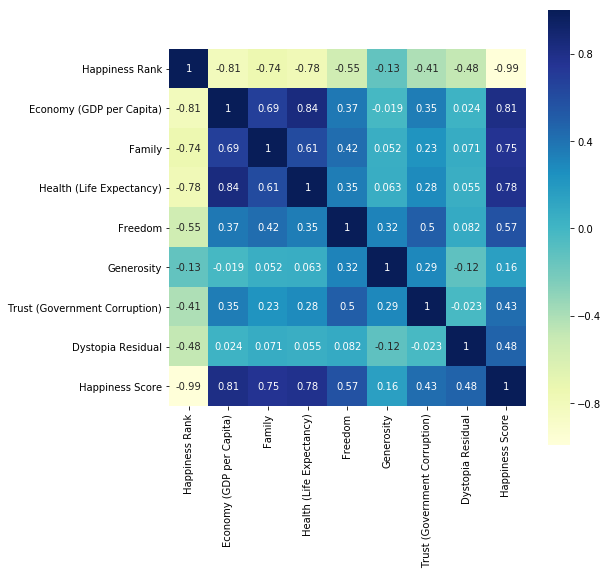

In [40]:
# Plot Correlation Heatmap to analyse correlation between continuous variables
df = df_raw[['Happiness Rank','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom', 
          'Generosity','Trust (Government Corruption)','Dystopia Residual','Happiness Score']] #Subsetting the data
cor = df.corr() #Calculate the correlation of the above variables

fig,ax = plt.subplots()
fig.set_figwidth(8)
fig.set_figheight(8)
sns.heatmap(cor, square = True,annot=True,cmap="YlGnBu") #Plot the correlation as heat map

### Step4: Preprocessing the data

In [41]:
# Scale all the variables to similar scale to avoid any biasness due to variabtion in their measurement scale
#Scaling of data
ss = StandardScaler()
ss.fit_transform(df)

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-1.7209121 ,  1.50618765,  1.20357658, ...,  1.90308438,
         0.85629599,  1.93599602],
       [-1.69856259,  1.18651768,  1.26503623, ...,  2.73999784,
         0.92989102,  1.92269283],
       [-1.67621309,  1.1823454 ,  1.47266877, ...,  0.30006608,
         0.94796425,  1.90672969],
       ...,
       [ 1.67621309, -1.12910094, -0.51306362, ..., -0.56334657,
        -2.4660431 , -1.77816933],
       [ 1.69856259, -2.12929212, -1.95262416, ..., -0.38459935,
        -0.33549229, -2.17193469],
       [ 1.7209121 , -2.34773594, -4.15212515, ..., -0.65680192,
         0.43290816, -2.35994869]])

### Step5: Kmean Approach to identify clusters
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model.

In [42]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [43]:
clust_labels, cent = doKmeans(df, 2)
kmeans = pd.DataFrame(clust_labels)
df.insert((df.shape[1]),'kmeans',kmeans)

In [44]:
# Just to check if kmeans column added to the dataframe
df.head()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Happiness Score,kmeans
0,1,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,7.537,0
1,2,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,7.522,0
2,3,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,7.504,0
3,4,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,7.494,0
4,5,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,7.469,0


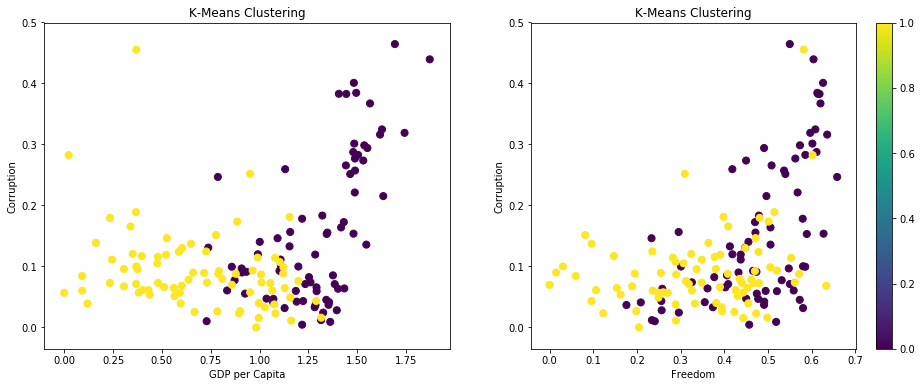

In [48]:
# Plot scatter plot
fig, (ax0,ax1) = plt.subplots(ncols= 2)
fig.set_figwidth(16)
fig.set_figheight(6)

# Scatter plots of Corruption vs GDP
scatter = ax0.scatter(df["Economy (GDP per Capita)"],df['Trust (Government Corruption)'],
                     c=kmeans[0],s=50)
ax0.set_title('K-Means Clustering')
ax0.set_xlabel('GDP per Capita')
ax0.set_ylabel('Corruption')

# Scatter plots of Corruption vs GDP

scatter = ax1.scatter(df['Freedom'],df['Trust (Government Corruption)'],
                     c=kmeans[0],s=50)
ax1.set_title('K-Means Clustering')
ax1.set_xlabel('Freedom')
ax1.set_ylabel('Corruption')

plt.colorbar(scatter)


In [49]:
# Convert Cluster to

df["cluster_name"] = df["kmeans"].apply(lambda x: "cluster0" if x == 0 else "cluster1")

/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [50]:
df.tail()

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Happiness Score,kmeans,cluster_name
150,151,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,3.471,1,cluster1
151,152,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,3.462,1,cluster1
152,153,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,3.349,1,cluster1
153,154,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024,2.905,1,cluster1
154,155,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005,2.693,1,cluster1


/Users/paragpradhan/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


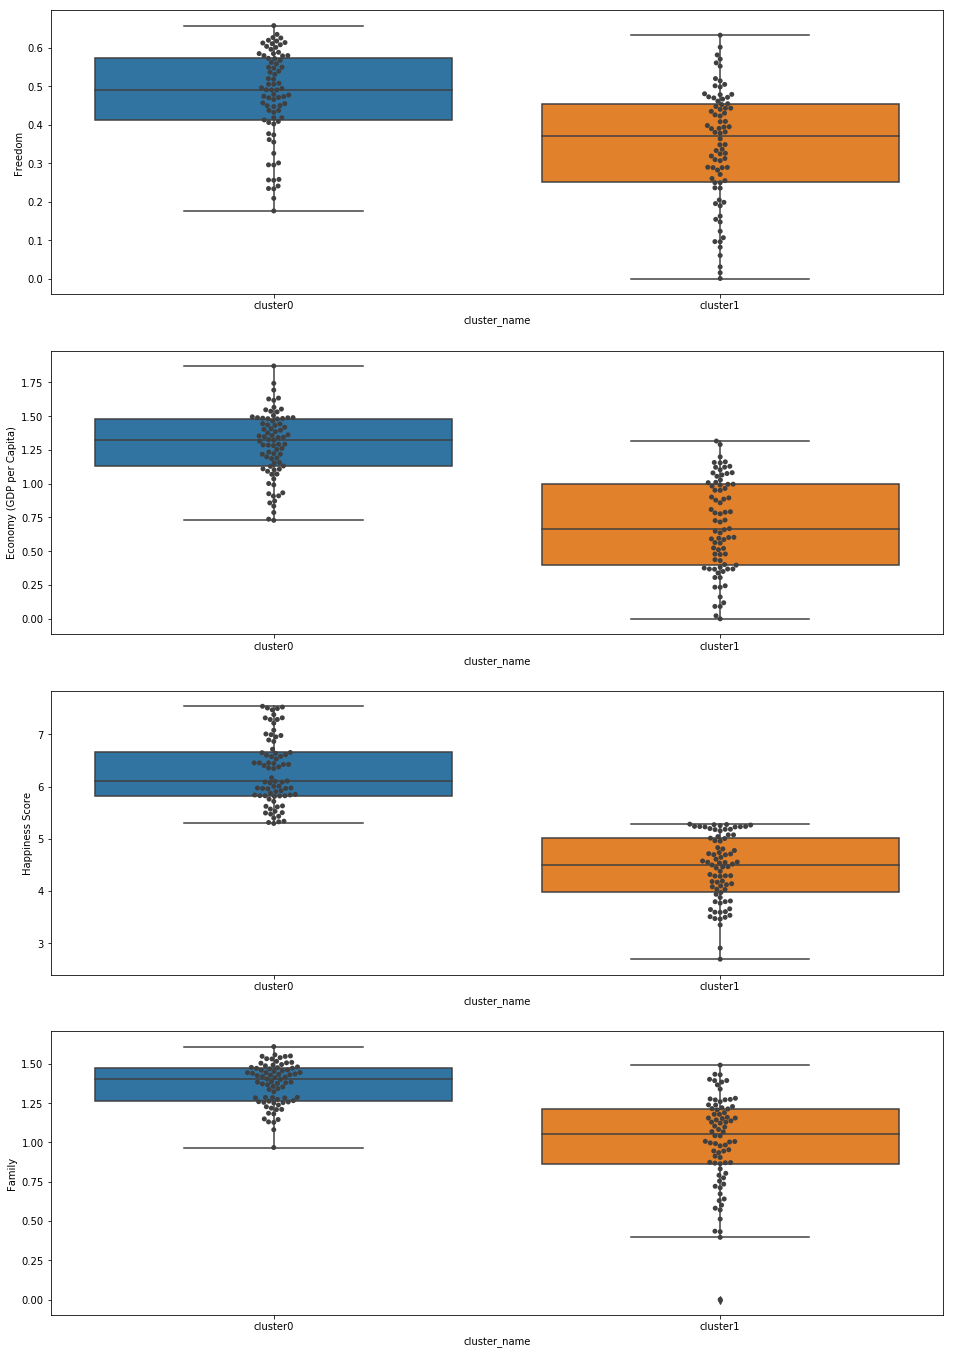

In [51]:
fig, (ax,ax2,ax3,ax4) = plt.subplots(nrows = 4)
fig.set_figwidth(16)
fig.set_figheight(24)
x = sns.boxplot(x="cluster_name", y='Freedom', data=df, ax= ax)
x = sns.swarmplot(x="cluster_name", y='Freedom', data=df,color=".25",ax= ax)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Economy (GDP per Capita)', data=df, ax= ax2)
x = sns.swarmplot(x="cluster_name", y='Economy (GDP per Capita)', data=df,color=".25",ax= ax2)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Happiness Score', data=df, ax= ax3)
x = sns.swarmplot(x="cluster_name", y='Happiness Score', data=df,color=".25",ax= ax3)
# Cluster analysis of employment
x = sns.boxplot(x="cluster_name", y='Family', data=df, ax= ax4)
x = sns.swarmplot(x="cluster_name", y='Family', data=df,color=".25",ax= ax4)

In [52]:
df.head(n=20)

,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Happiness Score,kmeans,cluster_name
0,1,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,7.537,0,cluster0
1,2,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,7.522,0,cluster0
2,3,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,7.504,0,cluster0
3,4,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,7.494,0,cluster0
4,5,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,7.469,0,cluster0
5,6,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804,7.377,0,cluster0
6,7,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264,7.316,0,cluster0
7,8,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456,7.314,0,cluster0
8,9,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538,7.284,0,cluster0
9,10,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211,7.284,0,cluster0
